# Vashisth Tiwari

In [1]:
# from scipy.optimize import minimize
import numpy as np
import sys
# from math import factorial
import scipy 
import scipy.special as ssp
from scipy.optimize import minimize
from scipy import integrate
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from IPython.display import display, Math

# from numpy import sqrt, sin, cos, pi, log, histogram2d
# from numpy import exp,arange
# from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
plt.style.use('seaborn-dark')
#plt.rcParams["figure.figsize"] = (5,5)

In [3]:
# Reading the text (source github 403)
# https://github.com/sybenzvi/PHY403/blob/master/nb/PyIntro.ipynb

data = np.genfromtxt('supernova_data.txt')

z = data[:,0]   # z values
m = data[:,1]   # m values
m_err = data[:,2] #error in m

len(z), len(m), len(m_err)
n = len(z)

In [4]:
c = 3e5 #the speed of light km/s instead of m/s

In [5]:
def lum_dist(z,omegaM,omegaL,H0):
    t1 = 1+z
    t2 = c/H0
    
    z_axis = np.linspace(0,z,50) # create 50 points linearly spaced 
    
    integrand = 1/np.sqrt(omegaM*((1+z_axis)**3)+omegaL)
    tz = np.trapz(integrand, x=z_axis)
    
    dL = t1*t2*tz *(10**6) # convert from Mp to p
    
    return dL

In [6]:
""" Function takes in parameters 
    returns the list of values predicted by the given hypothesis"""


def m_theory(omegaM,omegaL,H0,M):
    
    z = data[:,0]   # z values
    m_list= data[:,1]   # m values
    sigma = data[:,2] #error in m
    
    Fi_list = []
    for zi in z:
        dL = lum_dist(zi,omegaM,omegaL,H0)
        mu = 5*(np.log10(dL)-1)
        Fi = mu + M
        Fi_list.append(Fi)
    
    Fi_list = np.asarray(Fi_list)
    
    return Fi_list

In [7]:
""" Input: Takes in a list with parameters
    Returns: a chi squared values for the given m values """

def chi_sq(params):
    omegaM,omegaL,H0,M = params
    
    z = data[:,0]  # z values
    z = np.asarray(z)
    
    m_list= data[:,1]   # m values
    m_list = np.asarray(m_list)

    sigma = data[:,2] # error in m
    sigma = np.asarray(sigma)

    F_list = m_theory(omegaM,omegaL,H0,M)
    numerator = (F_list-m_list)**2
    denominator = sigma**2
    
    chi_sq = np.sum(numerator/denominator)
    return chi_sq

In [8]:
# list of bounds on Omega_M, Omega_Delta, H0, and M
bound_om = [0,3]
bound_od = [-1,4]
bound_H0 = [50,100]
bound_M = [-20,-18]

***
# 1(a)

In [9]:
# initial_guess = np.asarray([(0+3)/2,(-1+4)/2,(50+100)/2,(-18-20)/2])
initial_guess = [1,1,70,-19]

In [10]:
resulta = minimize(chi_sq, initial_guess,
                  method='SLSQP',
                  bounds = [bound_om, bound_od, bound_H0,bound_M]
                  ) 

result1a = minimize(chi_sq, initial_guess,
                  method='Powell',
                  bounds = [bound_om, bound_od, bound_H0,bound_M]
                  ) 

resultaa = minimize(chi_sq, [0.5, 1 ,  70 , -19],
                  method='TNC',
                  bounds = [bound_om, bound_od, bound_H0,bound_M]
                  )

# L-BFGS-B method was not working for some reason

/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [11]:
l = [resulta.fun, resultaa.fun, resultaa.fun]
l = np.sort(l)

In [12]:
l[0] == resulta.fun

True

In [13]:
resulta

     fun: 120.73783719165195
     jac: array([ 0.04432678,  0.02800369,  0.00108528, -0.03205585])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([  0.28261749,   0.7986938 ,  65.55164712, -19.23236445])

### Hence we choose the first method with SLSQP method instead of Powell or TNC 

In [14]:
omegaMa,omegaLa,H0a,Ma = resulta.x

In [15]:
print("For four parameter optimization we get\n")

display(Math(r'\Omega_M:{0} \\ \Omega_\Lambda: {1} \\ H_0: {2}\:km/s \: M/pc \\ M: {3}'.format(
    round(omegaMa,2),round(omegaLa,2),round(H0a,2),round(Ma,2))))

For four parameter optimization we get



<IPython.core.display.Math object>

In [16]:
mvalue = m_theory(omegaM=omegaMa,omegaL=omegaLa,H0=H0a,M=Ma) # predicted value

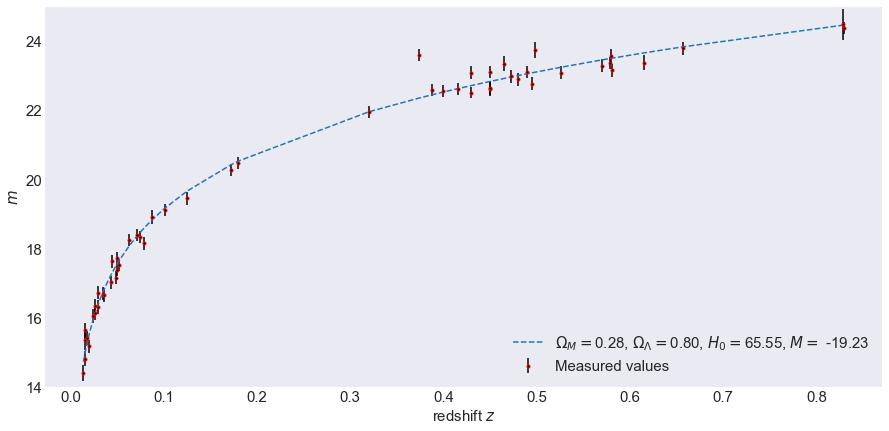

In [17]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 15})

plt.errorbar(z,m, yerr= m_err,fmt='k.', ecolor="black", mec='red', label ="Measured values")
plt.plot(z,mvalue,linestyle='--',label=r"$\Omega_M=${0:.2f}, $\Omega_\Lambda=${1:.2f}, $H_0=${2:.2f}, $M=$ {3:.2f}".
         format(omegaMa,omegaLa,H0a,Ma)) 
plt.ylim([14,25])
plt.xlabel(r"redshift $z$")
plt.ylabel(r"$m$")
plt.legend(loc="lower right")
plt.show()

___

# 1 (b)
$$\Omega_\Lambda = 1-\Omega_M$$

In [18]:
""" Input: Takes in a list with parameters
    Returns: a chi squared values for the given m values """


def chi_sq_b(params):
    omegaM,H0,M = params
    omegaL = 1 - omegaM
    
    z = data[:,0]  # z values
    z = np.asarray(z)
    
    m_list= data[:,1]   # m values
    m_list = np.asarray(m_list)

    sigma = data[:,2] #error in m
    sigma = np.asarray(sigma)

    F_list = m_theory(omegaM,1 - omegaM,H0,M)
    numerator = (F_list-m_list)**2
    denominator = sigma**2
    
    chi_sq = np.sum(numerator/denominator)
    return chi_sq

In [19]:
initial_guess = [1,70,-19]


resultb = minimize(chi_sq_b, initial_guess,
                  method='SLSQP',
                  bounds = [bound_om, bound_H0,bound_M]
                  ) 

result1b = minimize(chi_sq_b, initial_guess,
                  method='L-BFGS-B',
                  bounds = [bound_om, bound_H0,bound_M]
                  ) 

In [20]:
ll = [result1b.fun, resultb.fun]
ll = np.sort(ll)

In [21]:
ll[0] == result1b.fun
# Thus, we choose the L-BFGS-B method as lesser chi sq value
# The two values are very close to each other suggesting the goodness of the minimizers in both cases

True

In [22]:
resultb

     fun: 120.73783700283992
     jac: array([ 0.00442028,  0.00017643, -0.00668335])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([  0.26135872,  70.40030434, -19.16228076])

In [23]:
omegaMb,H0b,Mb = resultb.x

In [24]:
print("For three parameter optimization we get\n")

omegaLb = 1-omegaMb
display(Math(r'\Omega_M:{} \\ \Omega_\Lambda: {} \\ H_0: {} \:km/s \: M/pc  \\ M: {}'.format(
    round(omegaMb,2),round(omegaLb,2),round(H0b,2),round(Mb,2))))

For three parameter optimization we get



<IPython.core.display.Math object>

### The value of $\chi^2$ is the almost the same but with a reduced parameter. By what we learnt in Occam's Razor we can say that the reduced parameter fit is better and we are justified in doing so as we have similar $\chi^2$ value with one lesser degree of freedom.

***
# 1(c)
$$\Omega_M = 1$$
$$\Omega_\Lambda = 1-\Omega_M$$

In [25]:
def chi_sq_c(params):
    H0,M = params
    omegaM = 1
    omegaL = 1 - omegaM
    z = data[:,0]  # z values
    z = np.asarray(z)
    
    m_list= data[:,1]   # m values
    m_list = np.asarray(m_list)

    sigma = data[:,2] #error in m
    sigma = np.asarray(sigma)

    F_list = m_theory(1,1 - omegaM, H0,M)
    numerator = (F_list-m_list)**2
    denominator = sigma**2
    
    chi_sq = np.sum(numerator/denominator)
    return chi_sq

In [26]:
initial_guess = [70,-19]

resultc = minimize(chi_sq_c, initial_guess,
#                   method = 'nelder-mead'
                  method='SLSQP',
                  bounds = [bound_H0,bound_M]
#                   callback=store, # Store minimization steps
#                   options= {'gtol': 1E-20} # Tolerance for convergence
                  ) 

result1c = minimize(chi_sq_c, initial_guess,
#                   method = 'nelder-mead'
                  method='L-BFGS-B',
                  bounds = [bound_H0,bound_M]
#                   callback=store, # Store minimization steps
#                   options= {'gtol': 1E-20} # Tolerance for convergence
                  ) 

In [27]:
lll = [resultc.fun, result1c.fun]
lll = np.sort(lll)

In [28]:
lll[0] == result1c.fun
# we will choose the result from L-BFGS-B instead. 
# The two values are very close to each other suggesting the goodness of the minimizers in both cases

True

In [29]:
result1c

      fun: 172.35121008930597
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.25055600e-04,  5.68434142e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([ 69.71675268, -18.94817986])

In [30]:
H0c,Mc = result1c.x

In [31]:
print("For two parameter optimization we get\n")

omegaLb = 1-omegaMb
display(Math(r'\Omega_M:{} \\ \Omega_\Lambda: {} \\ H_0: {} \:km/s \: M/pc \\ M: {}'.format(
    round(1,2),round(0,2),round(H0c,2),round(Mc,2))))

For two parameter optimization we get



<IPython.core.display.Math object>

***
# 1(d)

In [32]:
st.norm.cdf(5), st.norm.ppf(0.9999997133484281)

(0.9999997133484281, 4.999999999970176)

In [33]:
1-0.9999997133484281

2.866515719235352e-07

Now assume our c value (threshold) is 5 sigma which corresponds to a p value is of order $10^{-7},10^{-8}$. 

In [34]:
delta_chisq = resultc.fun- resultb.fun # simpler - complex model
P = st.chi2.cdf(delta_chisq,1) # the probability of chi2 > than delta_chisq would be 1-P

In [35]:
# norm.interval(P)
# norm.isf(1-P)
st.norm.ppf(P)

7.088924173740083

In [36]:
1-P

6.757927550893328e-13

- We see that $\Lambda < c$ thus we can reject the simpler hypothesis with only two parameters instead of three as this corresponds to a 7 sigma event.

- It is also seen in the p value (1-P) being much much smaller than the p value that correspond to a 5 sigma event (or order 10^(-7)

- ### Thus we have a $7\sigma$ significant and thus we cannot say there is no dark energy density in the universe, and thus the addition of $\Omega_\Lambda$ is justified.

***
Thank you !